Analise dos valores de procedimetnos do Data SUS 

In [3]:
# importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
# configurando formato de apresentação de números
pd.options.display.float_format = "{:,.2f}".format


In [20]:
# importando os números
dados = pd.read_csv ("/content/A180024189_28_143_208.csv", encoding="ISO-8859-1", skiprows=3, skipfooter=12, sep=";", thousands=".", decimal=",")
# validações
# dados.head()
# dados.tail()
dados.dtypes
# dados["2021/Ago"]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


Unidade da Federação     object
2008/Jan                float64
2008/Fev                float64
2008/Mar                float64
2008/Abr                float64
                         ...   
2021/Mai                float64
2021/Jun                float64
2021/Jul                float64
2021/Ago                 object
Total                   float64
Length: 166, dtype: object

In [21]:
# tratando 2021/Ago para ser float
# primeiro trocar o campo não numério por zero
dados["2021/Ago"]=dados["2021/Ago"].replace("-", "0", regex=True)
# depois transformar em float
dados["2021/Ago"] = pd.to_numeric(dados["2021/Ago"], downcast="float")
# validando
dados.dtypes

Unidade da Federação     object
2008/Jan                float64
2008/Fev                float64
2008/Mar                float64
2008/Abr                float64
                         ...   
2021/Mai                float64
2021/Jun                float64
2021/Jul                float64
2021/Ago                float32
Total                   float64
Length: 166, dtype: object

In [22]:
# configurando cores do gráfico
plt.rcParams['figure.facecolor'] = 'black'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['legend.edgecolor'] = 'grey'
plt.rcParams['legend.facecolor'] = 'grey'
plt.rcParams['text.color'] = 'white'


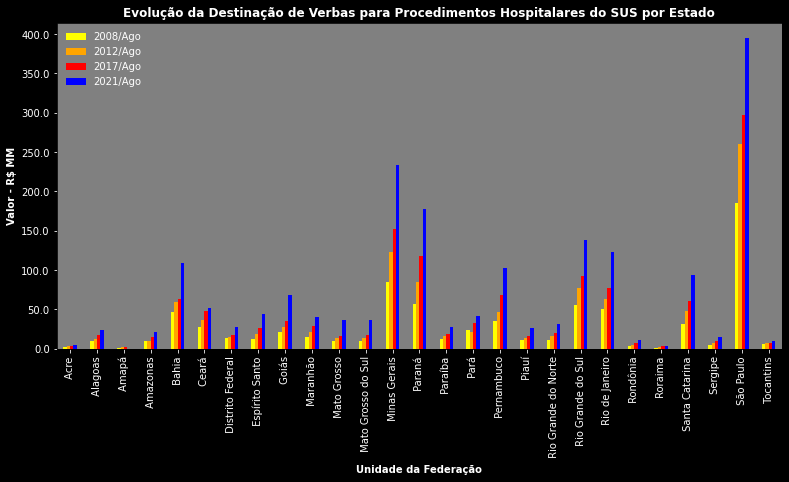

In [23]:
# ajustando os dados para melhor apresentação
# primeiro retirando os números do campo texto
dados["Unidade da Federação"] = dados["Unidade da Federação"].str.replace("\d+", "")
# depois colocando em ordem alfabética
dados = dados.sort_values(by=["Unidade da Federação"])

# definindo o que será exibido e formato
ax = dados.plot(x="Unidade da Federação", y=["2008/Ago","2012/Ago","2017/Ago","2021/Ago"], kind="bar", figsize=(13,6), color=["yellow","orange","red","blue"])
#ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

# ajustando escala do eixo 
escalaY = 1e6
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/escalaY)))

# ajustando cor do fundo da área de plotagem
ax.set_facecolor("grey")

# definindo titulos do gráfico e dos exios
plt.ylabel("Valor - R$ MM", fontweight="bold", color="white")
plt.xlabel("Unidade da Federação", fontweight="bold", color="white")
plt.title("Evolução da Destinação de Verbas para Procedimentos Hospitalares do SUS por Estado", fontweight="bold", color="white")

# exibindo o resultado
plt.show()



In [24]:
# lista de parametros que podemos ajustar a cor do gráfico
plt.rcParams
[(param, value) for param, value in plt.rcParams.items() if 'color' in param]

[('axes.edgecolor', 'black'),
 ('axes.facecolor', 'white'),
 ('axes.labelcolor', 'black'),
 ('axes.titlecolor', 'auto'),
 ('boxplot.boxprops.color', 'black'),
 ('boxplot.capprops.color', 'black'),
 ('boxplot.flierprops.color', 'black'),
 ('boxplot.flierprops.markeredgecolor', 'black'),
 ('boxplot.flierprops.markerfacecolor', 'none'),
 ('boxplot.meanprops.color', 'C2'),
 ('boxplot.meanprops.markeredgecolor', 'C2'),
 ('boxplot.meanprops.markerfacecolor', 'C2'),
 ('boxplot.medianprops.color', 'C1'),
 ('boxplot.whiskerprops.color', 'black'),
 ('figure.edgecolor', (1, 1, 1, 0)),
 ('figure.facecolor', 'black'),
 ('grid.color', '#b0b0b0'),
 ('hatch.color', 'black'),
 ('legend.edgecolor', 'grey'),
 ('legend.facecolor', 'grey'),
 ('lines.color', 'C0'),
 ('lines.markeredgecolor', 'auto'),
 ('lines.markerfacecolor', 'auto'),
 ('mpl_toolkits.legacy_colorbar', True),
 ('patch.edgecolor', 'black'),
 ('patch.facecolor', 'C0'),
 ('patch.force_edgecolor', False),
 ('pdf.inheritcolor', False),
 ('savefi